## Setup and install

In [1]:
!pip install vllm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.2/438.2 MB 65.6 MB/s  0:00:04m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 125.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB 33.8 MB/s  0:00:11m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 57.9 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 168.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 153.9 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 111.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 46.1 MB/s  0:00:06m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 133.8 MB/s  0:00:010:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 125.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 143.8 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 126.6 MB/s

In [2]:
!pip install git+https://github.com/bentoml/llm-optimizer.git

  Cloning https://github.com/bentoml/llm-optimizer.git to /tmp/pip-req-build-xuyqdfg8
  Running command git clone --filter=blob:none --quiet https://github.com/bentoml/llm-optimizer.git /tmp/pip-req-build-xuyqdfg8
  Resolved https://github.com/bentoml/llm-optimizer.git to commit bb82d22e8863b762e856be66e831d551d27576b1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_ml_py3-7.352.0-py3-none-any.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.1 MB/s  0:00:00
  Created wheel for llm-optimizer: filename=llm_optimizer-0.0.1-py3-none-any.whl size=103216 sha256=c33937724546a343125116fe65e91ecf8c38ce4157e95f4921d7e9763606638a
  Stored in directory: /tmp/pip-ephem-wheel-cache-4gw0ziy5/wheels/f1/1e/60/75fe0355bddcd0e3acecab1ec0b6ae3c9758e75eb62ab45409
Successfully built llm-optimizer
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [llm-optimizer]0m [openai]
ERROR: pip's depe

## Run an estimate

In [2]:
!llm-optimizer estimate --model Qwen/Qwen3-4B --gpu L40 --input-len 1024 --output-len 512

Auto-detected 4 GPU(s)
config.json: 100%|█████████████████████████████| 726/726 [00:00<00:00, 12.2MB/s]
💡 Inferred precision from model config: bf16

=== Configuration ===
Model: Qwen/Qwen3-4B
GPU: 4x L40
Precision: bf16
Input/Output: 1024/512 tokens
Target: throughput

Fetching model configuration...
Model: 3668377600.0B parameters, 36 layers

=== Performance Analysis ===
Best Latency (concurrency=1):
  TTFT: 16.8 ms
  ITL: 1.4 ms
  E2E: 0.72 s

Best Throughput (concurrency=1024):
  Output: 21601.0 tokens/s
  Input: 61062.1 tokens/s
  Requests: 24.71 req/s
  Bottleneck: Memory

=== Roofline Analysis ===
Hardware Ops/Byte Ratio: 195.1 ops/byte
Prefill Arithmetic Intensity: 31846.2 ops/byte
Decode Arithmetic Intensity: 31.1 ops/byte
Prefill Phase: Compute Bound
Decode Phase: Memory Bound

=== Concurrency Analysis ===
KV Cache Memory Limit: 1258 concurrent requests
Prefill Compute Limit: 21 concurrent requests
Decode Capacity Limit: 25 concurrent requests
Theoretical Overall Limit: 21 co

## Run a benchmark

Expect the runtime for the following step to increase exponentially as you add additional inference arg permutations 

In [6]:
!llm-optimizer \
  --framework vllm \
  --model Qwen/Qwen3-4B \
  --server-args "tensor_parallel_size=[1,2,4];max_num_batched_tokens=[4096,8192,16384]" \
  --client-args "max_concurrency=[32,64,128];num_prompts=1000;dataset_name=sharegpt" \
  --output-json vllm_results.json

2025-10-15 19:18:56,652 - llm_optimizer.main - INFO - Detected GPU type: NVIDIA L4, Count: 4
2025-10-15 19:18:56,652 [INFO] Detected GPU type: NVIDIA L4, Count: 4
2025-10-15 19:18:56,653 - llm_optimizer.main - INFO - Generated 27 configuration(s) to run.
2025-10-15 19:18:56,653 [INFO] Generated 27 configuration(s) to run.
2025-10-15 19:18:56,653 - llm_optimizer.main - INFO - --------------------------------------------------------------------------------
2025-10-15 19:18:56,653 [INFO] --------------------------------------------------------------------------------
2025-10-15 19:18:56,654 - llm_optimizer.main - INFO - Starting run 1/27: client_dataset_name-sharegpt-max_concurrency-32-num_prompts-1000_server_max_num_batched_tokens-4096-tensor_parallel_size-1
2025-10-15 19:18:56,654 [INFO] Starting run 1/27: client_dataset_name-sharegpt-max_concurrency-32-num_prompts-1000_server_max_num_batched_tokens-4096-tensor_parallel_size-1
2025-10-15 19:18:56,654 - llm_optimizer.server_utils - INFO 

## View Results

In [4]:
!llm-optimizer visualize --data-file vllm_results.json --port 8080 --serve

2025-10-17 17:09:52,745 - llm_optimizer.visualization.visualize - INFO - Loaded configuration from /opt/conda/lib/python3.12/site-packages/llm_optimizer/visualization/visualization_config.json
2025-10-17 17:09:52,745 [INFO] Loaded configuration from /opt/conda/lib/python3.12/site-packages/llm_optimizer/visualization/visualization_config.json
2025-10-17 17:09:52,745 - llm_optimizer.main - INFO - Generating dashboard from vllm_results.json...
2025-10-17 17:09:52,745 [INFO] Generating dashboard from vllm_results.json...
2025-10-17 17:09:52,745 - llm_optimizer.visualization.visualize - INFO - Loaded data from vllm_results.json
2025-10-17 17:09:52,745 [INFO] Loaded data from vllm_results.json
2025-10-17 17:09:52,746 - llm_optimizer.visualization.visualize - INFO - Metadata: GPU=NVIDIA L4 x4, Model=Qwen/Qwen3-4B
2025-10-17 17:09:52,746 [INFO] Metadata: GPU=NVIDIA L4 x4, Model=Qwen/Qwen3-4B
2025-10-17 17:09:52,746 - llm_optimizer.visualization.visualize - INFO - Total tests: 27
2025-10-17 17:

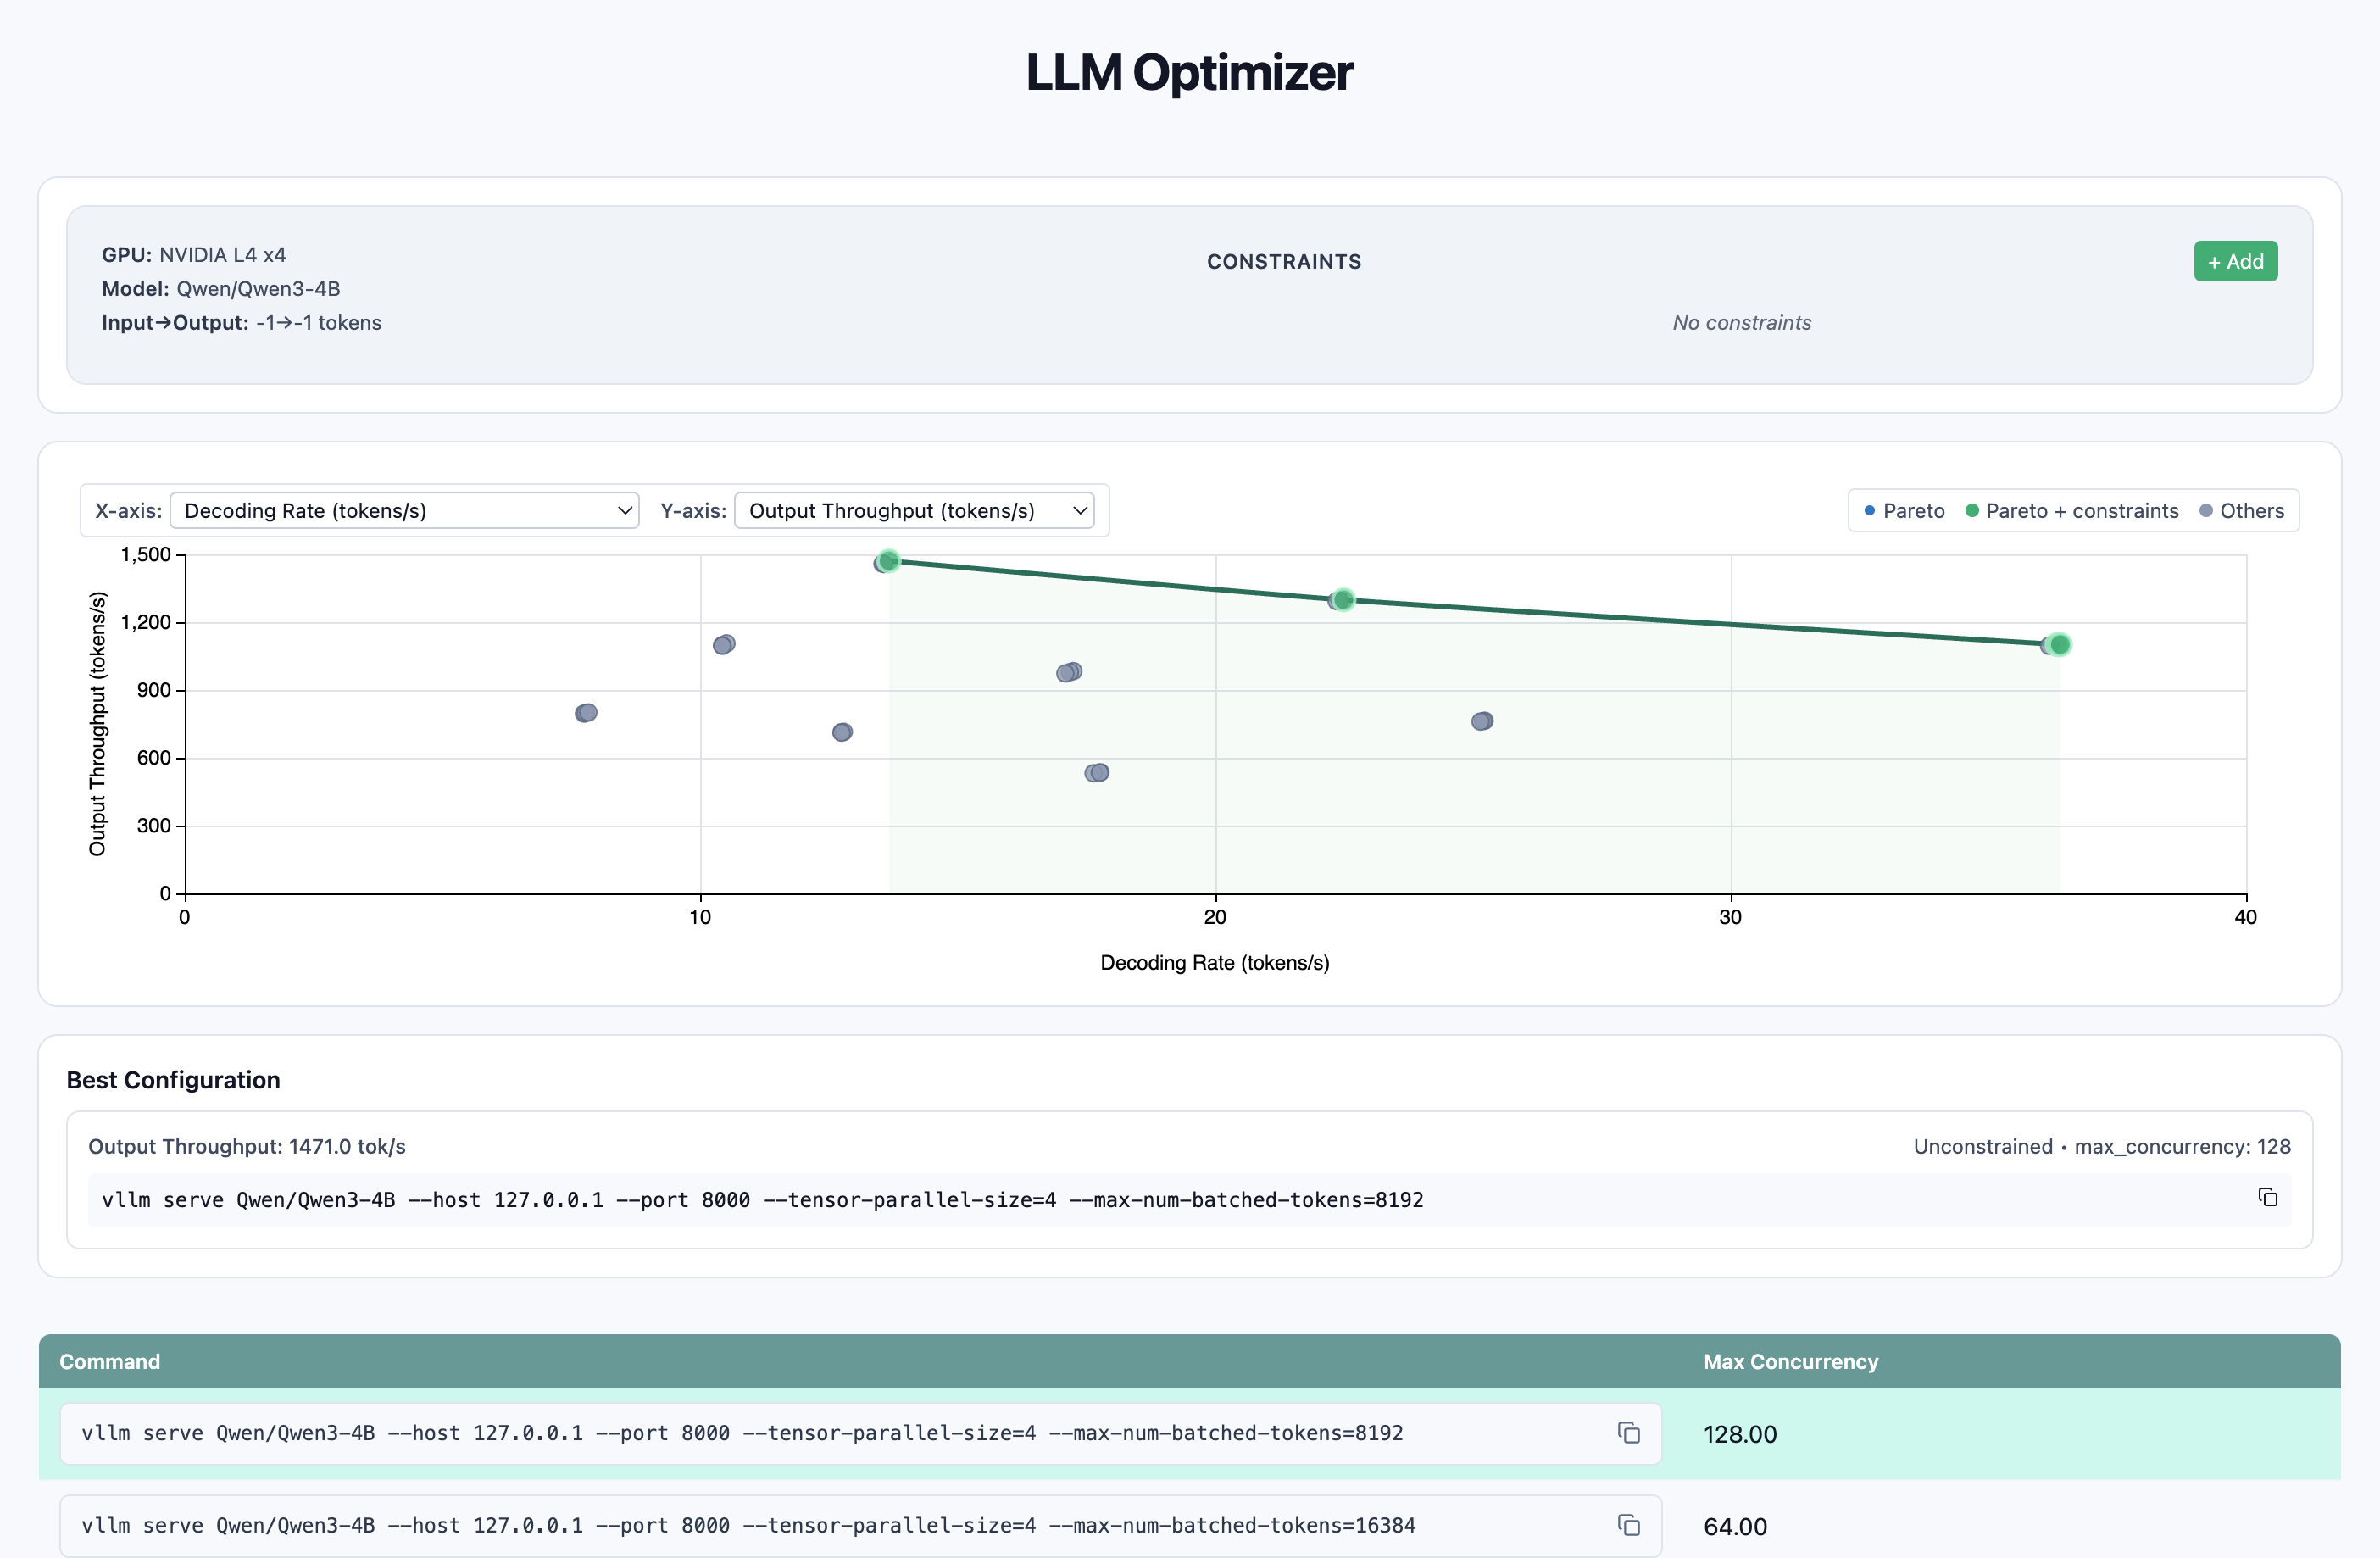

In [3]:
from IPython.display import Image, display
display(Image(filename='vllm_results.png'))

## Using the results for optimal serving with vLLM

In [ ]:
!pip install sagemaker boto3 huggingface-hub --upgrade --quiet

In [1]:
import sagemaker
from sagemaker import image_uris
import boto3
import os
import time
import json
from pathlib import Path
from sagemaker.utils import name_from_base
from huggingface_hub import snapshot_download

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [2]:
role = sagemaker.get_execution_role()  # execution role for the endpoint
sess = sagemaker.session.Session()  # sagemaker session for interacting with different AWS APIs
bucket = sess.default_bucket()  # bucket to house artifacts
model_bucket = sess.default_bucket()  # bucket to house artifacts

region = sess._region_name
account_id = sess.account_id()

s3_client = boto3.client("s3")
sm_client = boto3.client("sagemaker")
smr_client = boto3.client("sagemaker-runtime")

The env settings can be derived directly from the jsonl record created for us after benchmarking, which is also the suggested record shown in the screenshot above:
```json
{
    "config": {
        "client_args": {
            "max_concurrency": 128,
            "num_prompts": 1000,
            "dataset_name": "sharegpt"
        },
        "server_args": {
            "tensor_parallel_size": 4,
            "max_num_batched_tokens": 8192
        },
        "server_cmd_args": [
            "--tensor-parallel-size=4",
            "--max-num-batched-tokens=8192"
        ]
    },
    ...
    "cmd": "vllm serve Qwen/Qwen3-4B --host ********* --port 8000 --tensor-parallel-size=4 --max-num-batched-tokens=8192",
    "constraints": [],
    "metadata": {
        "gpu_type": "NVIDIA L4",
        "gpu_count": 4,
        "model_tag": "Qwen/Qwen3-4B",
        "input_tokens": -1,
        "output_tokens": -1
    }
}
```

In [ ]:
env = {
    "HF_MODEL_ID": "Qwen/Qwen3-4B",
    "OPTION_ASYNC_MODE": "true",
    "OPTION_ROLLING_BATCH": "disable",
    "OPTION_ENTRYPOINT": "djl_python.lmi_vllm.vllm_async_service",
    "OPTION_MAX_ROLLING_BATCH_PREFILL_TOKENS": "8192",
    "OPTION_TENSOR_PARALLEL_DEGREE": "max",
}

In [4]:
image_uri = f"763104351884.dkr.ecr.{region}.amazonaws.com/djl-inference:0.34.0-lmi16.0.0-cu128"
model_name = name_from_base("qwen3-4b-optimized")

create_model_response = sm_client.create_model(
    ModelName = model_name,
    ExecutionRoleArn = role,
    PrimaryContainer = {
        "Image": image_uri,
        "Environment": env,
    },
)
model_arn = create_model_response["ModelArn"]

In [5]:
endpoint_config_name = f"{model_name}-config"
endpoint_name = f"{model_name}-endpoint"

endpoint_config_response = sm_client.create_endpoint_config(
    EndpointConfigName=endpoint_config_name,
    ProductionVariants=[
        {
            "VariantName": "AllTraffic",
            "ModelName": model_name,
            "InstanceType": "ml.g6.12xlarge",
            "InitialInstanceCount": 1,
            "ModelDataDownloadTimeoutInSeconds": 1800,
            "ContainerStartupHealthCheckTimeoutInSeconds": 1800,
        },
    ],
)
print(f"endpoint_name: {endpoint_name}")

endpoint_name: qwen3-4b-optimized-2025-10-30-18-02-01-350-endpoint


In [6]:
create_endpoint_response = sm_client.create_endpoint(
    EndpointName=endpoint_name, EndpointConfigName=endpoint_config_name
)

In [7]:
import time

resp = sm_client.describe_endpoint(EndpointName=endpoint_name)
status = resp["EndpointStatus"]
print("Status: " + status)

while status == "Creating":
    time.sleep(60)
    resp = sm_client.describe_endpoint(EndpointName=endpoint_name)
    status = resp["EndpointStatus"]
    print("Status: " + status)

print("Arn: " + resp["EndpointArn"])
print("Status: " + status)

Status: Creating
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Status: Creating
Status: InService
Arn: arn:aws:sagemaker:us-east-1:337909754150:endpoint/qwen3-4b-optimized-2025-10-30-18-02-01-350-endpoint
Status: InService


In [8]:
request = {
    "messages": [
            {"role": "user", "content": "What is Amazon SageMaker?"}
            ],
            "max_tokens": 50,
            "temperature": 0.75,
            "stop": None
}

In [9]:
%%time

response_model = smr_client.invoke_endpoint(
    EndpointName=endpoint_name,
    Body=json.dumps(request),
    ContentType="application/json",
)

response = response_model["Body"].read()
response

CPU times: user 4.17 ms, sys: 7.12 ms, total: 11.3 ms
Wall time: 1.27 s


b'{"id":"chatcmpl-0adfc8a5ca0d4091be4ea9d0af117d7d","object":"chat.completion","created":1761847840,"model":"lmi","choices":[{"index":0,"message":{"role":"assistant","content":"<think>\\nOkay, the user is asking about Amazon SageMaker. I need to explain what it is. Let me start by recalling the basics. SageMaker is a service by AWS for machine learning. It\'s designed to help users build, train,","refusal":null,"annotations":null,"audio":null,"function_call":null,"tool_calls":[],"reasoning_content":null},"logprobs":null,"finish_reason":"length","stop_reason":null,"token_ids":null}],"service_tier":null,"system_fingerprint":null,"usage":{"prompt_tokens":14,"total_tokens":64,"completion_tokens":50,"prompt_tokens_details":null},"prompt_logprobs":null,"prompt_token_ids":null,"kv_transfer_params":null}\n'

In [11]:
from pprint import pprint
pprint(json.loads(response))

{'choices': [{'finish_reason': 'length',
              'index': 0,
              'logprobs': None,
              'message': {'annotations': None,
                          'audio': None,
                          'content': '<think>\n'
                                     'Okay, the user is asking about Amazon '
                                     'SageMaker. I need to explain what it is. '
                                     'Let me start by recalling the basics. '
                                     'SageMaker is a service by AWS for '
                                     "machine learning. It's designed to help "
                                     'users build, train,',
                          'function_call': None,
                          'reasoning_content': None,
                          'refusal': None,
                          'role': 'assistant',
                          'tool_calls': []},
              'stop_reason': None,
              'token_ids': None}],
 'crea

In [12]:
sm_client.delete_endpoint(EndpointName=endpoint_name)
sm_client.delete_endpoint_config(EndpointConfigName=endpoint_config_name)

{'ResponseMetadata': {'RequestId': '4d92406c-30ee-4310-866d-bbb991150160',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '4d92406c-30ee-4310-866d-bbb991150160',
   'strict-transport-security': 'max-age=47304000; includeSubDomains',
   'x-frame-options': 'DENY',
   'content-security-policy': "frame-ancestors 'none'",
   'cache-control': 'no-cache, no-store, must-revalidate',
   'x-content-type-options': 'nosniff',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Thu, 30 Oct 2025 18:12:10 GMT',
   'content-length': '0'},
  'RetryAttempts': 0}}